<a href="https://colab.research.google.com/github/balyashukla1/incentivizing-data-sharing/blob/master/COVID_19_Cluster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from pandas import Series, DataFrame


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv("/content/owid-covid-data.csv",encoding='cp1252')

In [72]:
data

,iso_code,location,total_cases,total_deaths,population,population_density,median_age,aged_65_older,gdp_per_capita,hospital_beds_per_10k,Unemployment,Concentrations of fine particulate matter (PM2.5),Medical_doctors_per_10k
0,AFG,Afghanistan,5339,136,38928341,54.422,18.6,2.581,1803.987,5,1.52,59.9,2.782
1,ALB,Albania,898,31,2877800,104.871,38.0,13.188,11803.431,29,12,18.2,12.164
2,ARE,United Arab Emirates,21084,208,9890400,112.442,34.0,1.144,67293.483,12,2.64,37.2,23.710
3,ARG,Argentina,7121,353,45195777,16.177,31.9,11.198,18933.907,50,9.825,11.7,40.013
4,ARM,Armenia,3860,49,2963234,102.931,35.7,11.232,8787.580,42,17.707,32.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,VEN,Venezuela (Bolivarian Republic of),455,10,28435943,36.253,29.0,6.614,16745.022,8,9.08,16.8,NaN
100,VNM,Viet Nam,312,0,97338583,308.127,32.6,7.150,6171.884,26,2.21,30.1,8.281
101,YEM,Yemen,87,13,29825968,53.508,20.3,2.922,1479.147,7,12.81,44.3,NaN
102,ZAF,South Africa,12739,238,59308690,46.754,27.3,5.344,12294.876,28,28.7,24.3,7.997


In [0]:
df = data.drop(columns=["population", "Medical_doctors_per_10k"])

In [74]:
df.isna().sum()

iso_code                                             0
location                                             0
total_cases                                          0
total_deaths                                         0
population_density                                   0
median_age                                           0
aged_65_older                                        0
gdp_per_capita                                       0
hospital_beds_per_10k                                0
Unemployment                                         0
Concentrations of fine particulate matter (PM2.5)    0
dtype: int64

In [0]:
df.dropna(how='any', inplace=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 103
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   iso_code                                           103 non-null    object 
 1   location                                           103 non-null    object 
 2   total_cases                                        103 non-null    int64  
 3   total_deaths                                       103 non-null    int64  
 4   population_density                                 103 non-null    float64
 5   median_age                                         103 non-null    float64
 6   aged_65_older                                      103 non-null    float64
 7   gdp_per_capita                                     103 non-null    float64
 8   hospital_beds_per_10k                              103 non-null    int64  
 9   Unemployme

In [0]:
df["Unemployment "] = df["Unemployment "].apply(pd.to_numeric, errors='coerce')

In [0]:
df["hospital_beds_per_10k"] = df["hospital_beds_per_10k"].apply(pd.to_numeric, errors='coerce')

In [0]:
df['location'] = df['location'].astype('str') 

In [0]:
X = np.array(df.drop(['location', 'iso_code', 'total_cases', 'total_deaths'], 1).astype(float))

In [0]:
y = np.array(df['location'])

In [0]:
from sklearn.metrics import silhouette_score

def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [0]:
wss = calculate_WSS(X, 10)

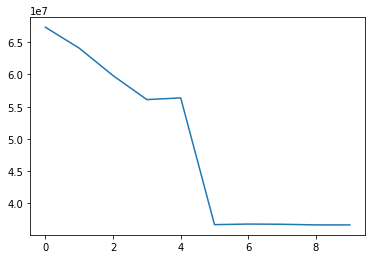

In [108]:
plt.plot(wss) ## looks like the elbow is at k = 5

In [90]:
kmeans = kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [91]:
print(kmeans.cluster_centers_)

[[1.18056700e+02 3.31133333e+01 9.41903333e+00 1.47564137e+04
  3.20333333e+01 8.79270000e+00 2.60566667e+01]
 [3.23125611e+02 4.09888889e+01 1.72244444e+01 4.49450011e+04
  4.76111111e+01 4.62744444e+00 1.75222222e+01]
 [1.06939348e+02 3.93260870e+01 1.51235217e+01 2.77546194e+04
  4.59130435e+01 6.06143478e+00 1.66434783e+01]
 [1.66879120e+03 3.89000000e+01 1.18254000e+01 7.58484362e+04
  3.02000000e+01 3.80200000e+00 1.64800000e+01]
 [1.65359111e+02 2.62629630e+01 5.97718519e+00 5.78277307e+03
  1.64814815e+01 7.49340741e+00 3.33666667e+01]]


In [0]:
predict=kmeans.predict(X)

In [0]:
df['Cluster'] = Series(predict, index=df.index)

In [95]:
df

,iso_code,location,total_cases,total_deaths,population_density,median_age,aged_65_older,gdp_per_capita,hospital_beds_per_10k,Unemployment,Concentrations of fine particulate matter (PM2.5),Cluster
0,AFG,Afghanistan,5339,136,54.422,18.6,2.581,1803.987,5,1.520,59.9,4
1,ALB,Albania,898,31,104.871,38.0,13.188,11803.431,29,12.000,18.2,0
2,ARE,United Arab Emirates,21084,208,112.442,34.0,1.144,67293.483,12,2.640,37.2,3
3,ARG,Argentina,7121,353,16.177,31.9,11.198,18933.907,50,9.825,11.7,0
4,ARM,Armenia,3860,49,102.931,35.7,11.232,8787.580,42,17.707,32.9,4
...,...,...,...,...,...,...,...,...,...,...,...,...
99,VEN,Venezuela (Bolivarian Republic of),455,10,36.253,29.0,6.614,16745.022,8,9.080,16.8,0
100,VNM,Viet Nam,312,0,308.127,32.6,7.150,6171.884,26,2.210,30.1,4
101,YEM,Yemen,87,13,53.508,20.3,2.922,1479.147,7,12.810,44.3,4
102,ZAF,South Africa,12739,238,46.754,27.3,5.344,12294.876,28,28.700,24.3,0


In [97]:
df[['location', 'Cluster']]

,location,Cluster
0,Afghanistan,4
1,Albania,0
2,United Arab Emirates,3
3,Argentina,0
4,Armenia,4
...,...,...
99,Venezuela (Bolivarian Republic of),0
100,Viet Nam,4
101,Yemen,4
102,South Africa,0


In [0]:
df.to_excel("output.xlsx")